## Machine Learning Online Class - Exercise 1: Linear Regression

This file contains code that helps you get started on the linear exercise.

>x refers to the population size in 10,000s

>y refers to the profit in $10,000s

## 1. Linear regression with one variable
## Part 1: Initialization

In [1]:
import numpy as np
import pandas as pd # 读取数据到DataFrame
from matplotlib import pyplot as plt
# 在notebook中显示绘图结果
%matplotlib inline

# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib
# 设置图片尺寸 14" x 7"
# rc: resource configuration   资源配置
matplotlib.rc('figure', figsize = (14, 7))
# 设置字体 14
matplotlib.rc('font', size = 14)
# 不显示顶部和右侧的坐标线
matplotlib.rc('axes.spines', top = False, right = False)
# 不显示网格
matplotlib.rc('axes', grid = False)
# 设置背景颜色是白色
matplotlib.rc('axes', facecolor = 'white')

names1 = ['xlabel','ylabel']
data1 = pd.read_csv('ex1data1.txt',names = names1)
data1.head()

,xlabel,ylabel
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Part 2: Plotting the Data

Plot the training data into a figure.

In [2]:
# 包装一个散点图的函数便于复用
def scatterplot(x_data, y_data, x_label, y_label, title):

    # 创建一个绘图对象
    fig, ax = plt.subplots()

    # 设置数据x_data和y_data、点的大小s、点的颜色和透明度
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75) # http://www.114la.com/other/rgb.htm

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

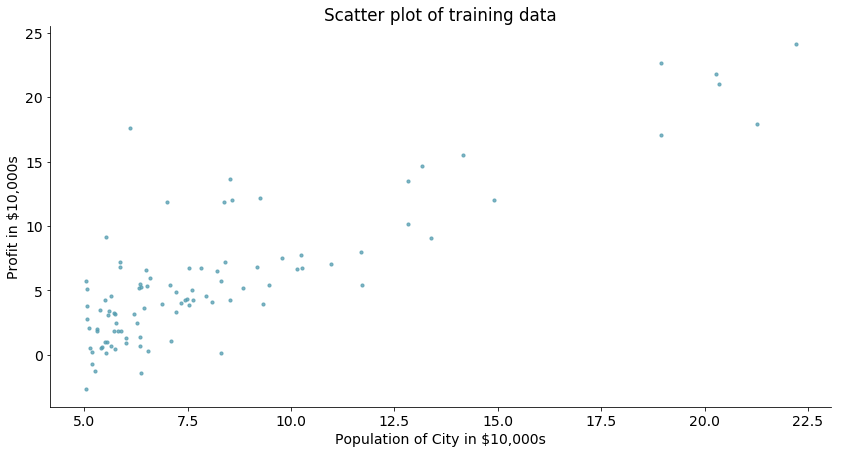

In [3]:
# 绘制散点图
scatterplot(x_data = data1['xlabel']
            , y_data = data1['ylabel']
            , x_label = 'Population of City in $10,000s'
            , y_label = 'Profit in $10,000s'
            , title = 'Scatter plot of training data')

## Part 3: Gradient descent

In [4]:
def computeCost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    # COMPUTECOST(X, y, theta) computes the cost of using theta as the 
    # parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = y.shape[0] # number of training examples  # m = 97
    
    # You need to return the following variables correctly 
    J = 0
    # Compute the cost of a particular choice of theta. 
    J = sum( (X.dot(theta) -y)**2 ) / (2 * m) 
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    # Performs gradient descent to learn theta
    # theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples  # m = 97
    J_history = np.array([np.zeros(num_iters)]).T
    
    #Instructions: Perform a single gradient step on the parameter vector theta.
    for iter in range(num_iters):   # from 0 to 1499
        H = X.dot(theta)
        T = np.array([np.array([0,0])]).T   # (2,1)
        for i in range(m):  # from 0 to 96
            T = T + (H[i] -y[i]) * np.array([X[i]]).T
        theta = theta - (alpha * T) / m
    
        # Save the cost J in every iteration
        J_history[iter]= computeCost(X, y ,theta)
    return theta, J_history

[ 32.07273388]
Theta found by gradient descent: -3.630291 1.166362
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


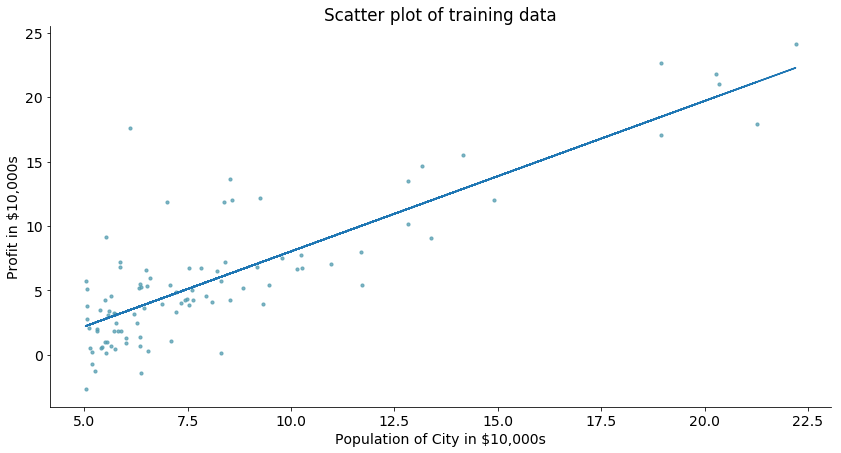

In [5]:
m = data1.xlabel.shape[0]  # number of training examples # m = 97 
xx = data1['xlabel'].tolist()
yy = data1['ylabel'].tolist()
X = np.array([(np.ones((m))),(np.array(xx))]).T  # Add a column of ones to x   # (97,2)
y = np.array([np.array(yy)]).T # (97,1)

theta = np.zeros((2,1))  # initialize fitting parameters   # (2,1)

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
print(computeCost(X, y, theta))

# run gradient descent
(theta,J_history) = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen 
print('Theta found by gradient descent: %f %f' %(theta[0] , theta[1]))

# Plot the linear fit
scatterplot(x_data = data1['xlabel']
            , y_data = data1['ylabel']
            , x_label = 'Population of City in $10,000s'
            , y_label = 'Profit in $10,000s'
            , title = 'Scatter plot of training data')
plt.plot(X[:,1], X.dot(theta))

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population = 35,000, we predict a profit of %f' %(predict1*10000))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of %f' %(predict2*10000))

## Part 4: Visualizing J(theta_0, theta_1)

In [6]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros(len(theta0_vals)*len(theta1_vals)).reshape((len(theta0_vals), len(theta1_vals)))  # (100,100)

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i], theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t.T)

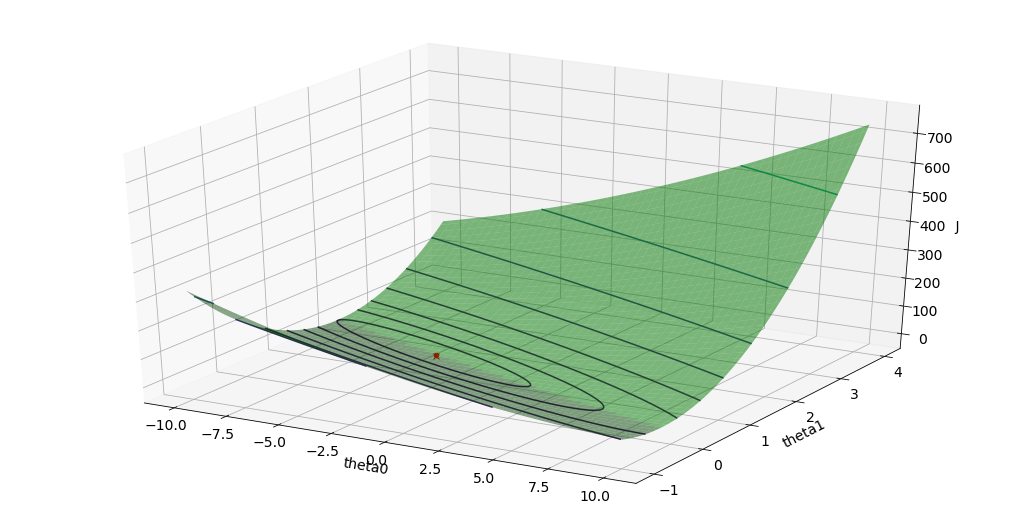

In [7]:
# Because of the way meshgrids work in the surface command, we need to 
# transpose J_vals before calling surface, or else the axes will be flipped
import mpl_toolkits.mplot3d.axes3d as p3
xzim, yzim = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(theta[0], theta[1], computeCost(X, y, theta), color='r')
# 参考来源：https://github.com/sndnyang/studylib/blob/master/ai/ml/ng_ex1.ipynb
ax.plot_surface(xzim, yzim, J_vals.T, color='g', alpha=.5)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel(' J ')

# Transpose J_vals before calling contour, or else the axes will be flipped
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta[0],theta[1],'rx')

## 2. Linear regression with multiple variables

In [8]:
# Load Data
names2 = ['size', 'bedroom', 'price']
data2 = pd.read_csv('ex1data2.txt',names = names2)

m = data2.price.shape[0]  # number of training examples # m = 47 
xx = data2[['size','bedroom']]
yy = data2['price']
#X = np.array([np.ones(m),xx]).T  # Add a column of ones to x   # (47,2)
#y = np.array([np.array(yy)]).T # (47,1)

print('First 10 examples from the dataset: \n')
print(data2.head(10))

First 10 examples from the dataset: 

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900
5  1985        4  299900
6  1534        3  314900
7  1427        3  198999
8  1380        3  212000
9  1494        3  242500


## Part 1: Feature Normalization
FEATURENORMALIZE Normalizes the features in X 

In [9]:
def featureNormalize(X):
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

#Instructions: First, for each feature dimension, compute the mean
#               of the feature and subtract it from the dataset,
#               storing the mean value in mu. Next, compute the 
#               standard deviation of each feature and divide
#               each feature by it's standard deviation, storing
#               the standard deviation in sigma. 
#
#               Note that X is a matrix where each column is a 
#               feature and each row is an example. You need 
#               to perform the normalization separately for 
#               each feature. 
    m = X.shape[0]
    X_norm = X
    mu = np.mean(X)
    for i in range(m):
        X_norm.iloc[i] = X.iloc[i] - mu
    
    sigma = np.std(X,ddof=1)   # learn more -> help(np.std)
    for i in range(m):
        X_norm.iloc[i] = X_norm.iloc[i]/sigma
    return X_norm,mu,sigma

In [10]:
# Scale features and set them to zero mean
[X,mu,sigma] = featureNormalize(xx)
# Add intercept term to X
df1 = pd.DataFrame(np.array([np.ones((m))]).T)
df2 = pd.DataFrame(np.array(X))
X = np.array(pd.concat([df1,df2],axis=1))
pd.concat([df1,df2],axis=1).head()

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-pack

,0,0,1
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


## Part 2: Gradient Descent

In [11]:
def computeCostMulti(X, y, theta):
    # COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    # COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = y.shape[0] # number of training examples  # m = 47
    
    # You need to return the following variables correctly 
    J = 0
    # Compute the cost of a particular choice of theta. 
    J = sum( (X.dot(theta) -y)**2 ) / (2 * m) 
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Performs gradient descent to learn theta
    # theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples  # m = 47
    n = X.shape[1] # number of colomns  # n = 3
    J_history = np.array([np.zeros(num_iters)]).T
    
    #Instructions: Perform a single gradient step on the parameter vector theta.
    for iter in range(num_iters):   # from 0 to 99
        H = X.dot(theta)
        T = np.array([np.zeros([n])]).T   # (n,1)
        for i in range(m):  # from 0 to 46
            T = T + (H[i] -y[i]) * np.array([X[i]]).T
        theta = theta - (alpha * T) / m
    
        # Save the cost J in every iteration
        J_history[iter]= computeCostMulti(X, y ,theta)
    return theta, J_history

Theta computed from gradient descent: 
 340412.659574 
 110630.992737 
 -6649.416729 



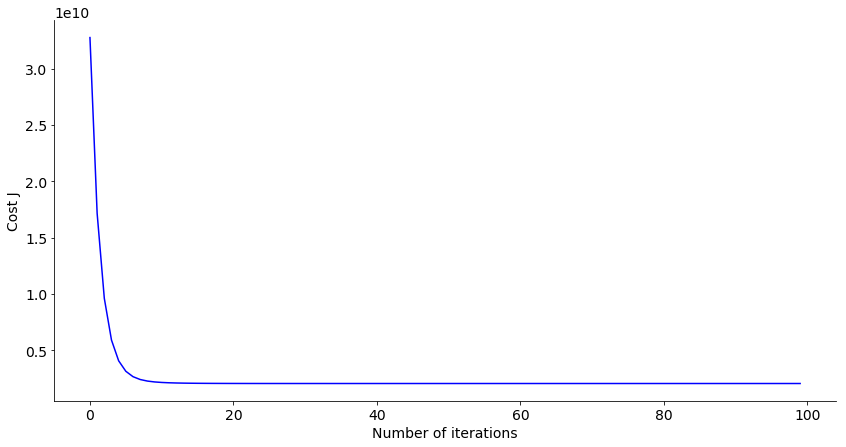

In [12]:
# Choose some alpha value
alpha = 0.3
num_iters = 100

# Init Theta and Run Gradient Descent 
theta = np.array([np.zeros([3])]).T
[theta, J_history] = gradientDescentMulti(X, np.array([yy]).T, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(' %f \n %f \n %f \n' %(theta[0],theta[1],theta[2]))

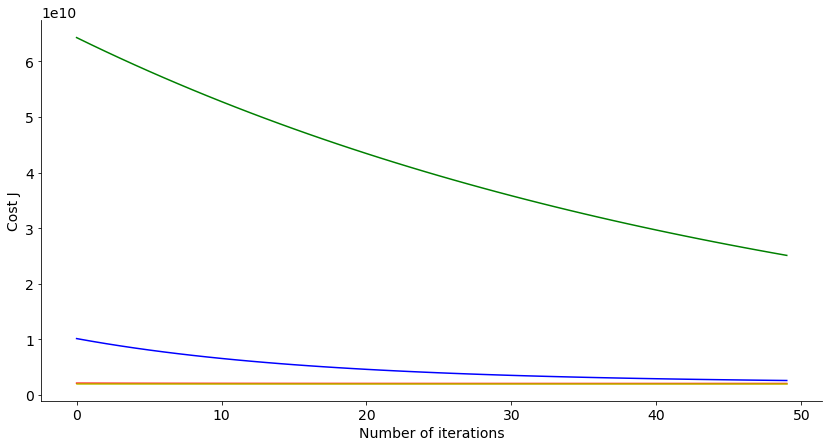

In [13]:
# Init Theta and Run Gradient Descent 
theta = np.array([np.zeros([3])]).T
[theta, J_history1] = gradientDescentMulti(X, np.array([yy]).T, theta, 0.01, num_iters)
[theta, J_history2] = gradientDescentMulti(X, np.array([yy]).T, theta, 0.03, num_iters)
[theta, J_history3] = gradientDescentMulti(X, np.array([yy]).T, theta, 0.1, num_iters)
[theta, J_history4] = gradientDescentMulti(X, np.array([yy]).T, theta, 0.3, num_iters)

# Plot the convergence graph
plt.plot(np.array([range(50)]).T,J_history1[0:50], '-g')
plt.plot(np.array([range(50)]).T,J_history2[0:50], '-b')
plt.plot(np.array([range(50)]).T,J_history3[0:50], '-r')
plt.plot(np.array([range(50)]).T,J_history4[0:50], '-y')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [14]:
# Estimate the price of a 1650 sq-ft, 3 br house

# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

[predict,mu,sigma] = featureNormalize(pd.DataFrame(np.array([1650, 3])))
df1 = pd.DataFrame(np.array([np.ones((1))]).T)
TT = np.array(pd.concat([df1,predict.T],axis=1))
price = TT.dot(theta)

print('Predicted price of a 1650 sq-ft, 3 br house '  '(using gradient descent): %f \n' %price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 423342.513608 



## Part 3: Normal Equations
NORMALEQN Computes the closed-form solution to linear regression 

In [15]:
from numpy.linalg import inv
def normalEqn(X, y):
#   NORMALEQN(X,y) computes the closed-form solution to linear 
#   regression using the normal equations.

    theta = np.array([np.zeros(X.shape[1])]).T

#   Instructions: Complete the code to compute the closed form solution
#               to linear regression and put the result in theta.
    theta = inv(np.matrix(X.T.dot(X))).dot(X.T)*y
    return theta

In [16]:
# Calculate the parameters from the normal equation
theta = normalEqn(X,np.array([yy]).T)

# Display normal equation's result
print('Theta computed from the normal equations:')
print(' %f \n %f \n %f'  %(theta[0],theta[1],theta[2]))

# Estimate the price of a 1650 sq-ft, 3 br house
[predict,mu,sigma] = featureNormalize(pd.DataFrame(np.array([1650, 3])))
df1 = pd.DataFrame(np.array([np.ones((1))]).T)
TT = np.array(pd.concat([df1,predict.T],axis=1))
price = TT.dot(theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): %f\n'  %price);

Theta computed from the normal equations:
 340412.659574 
 110631.050279 
 -6649.474271
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 423342.513785

